<a href="https://colab.research.google.com/github/Shivam-Ra/EDA/blob/main/Mod_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree

import networkx as nx

import pandas as pd
import numpy as np


data= pd.read_csv('/content/mroz (1).csv')

In [19]:
data_subset = data[['hours', 'wage', 'educ']]


# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_subset)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [20]:
spectral_cluster = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
clusters = spectral_cluster.fit_predict(data_scaled)

# Add the clustering results to the original dataframe
data['SpectralCluster'] = clusters

# Display the first few rows of relevant columns
print(data[['hours', 'wage', 'educ', 'SpectralCluster']].head())

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


   hours    wage  educ  SpectralCluster
0   1610  3.3540    12                0
1   1656  1.3889    12                0
2   1980  4.5455    12                0
3    456  1.0965    12                0
4   1568  4.5918    14                0


In [21]:
data_subset = data[['hours', 'wage', 'educ']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

In [22]:
# Compute the pairwise distance matrix
distance_matrix = squareform(pdist(data_scaled))

# Construct the Minimum Spanning Tree (MST)
mst_matrix = minimum_spanning_tree(distance_matrix).toarray()

# Convert MST to a NetworkX graph for easier manipulation
mst_graph = nx.Graph(mst_matrix)

In [23]:
# Set the number of clusters by removing edges with the highest weights
n_clusters = 3
edges_to_remove = sorted(mst_graph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:n_clusters-1]
mst_graph.remove_edges_from([(u, v) for u, v, w in edges_to_remove])

# Extract connected components as clusters
clusters = list(nx.connected_components(mst_graph))

# Assign cluster labels to each data point
cluster_labels = np.zeros(len(data_scaled), dtype=int)
for cluster_id, nodes in enumerate(clusters):
    for node in nodes:
        cluster_labels[node] = cluster_id

# Add the MST clustering results to the original dataframe
data['MSTCluster'] = cluster_labels

# Display the first few rows of relevant columns
print(data[['hours', 'wage', 'educ', 'MSTCluster']].head())

   hours    wage  educ  MSTCluster
0   1610  3.3540    12           0
1   1656  1.3889    12           0
2   1980  4.5455    12           0
3    456  1.0965    12           0
4   1568  4.5918    14           0


In [26]:
data_subset = data[['hours', 'wage', 'educ']]


# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_subset)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Apply Gaussian Mixture Model clustering with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data_scaled)
gmm_clusters = gmm.predict(data_scaled)

# Add the GMM clustering results to the original dataframe
data['GMMCluster'] = gmm_clusters

# Display the first few rows of relevant columns
print(data[['hours', 'wage', 'educ', 'GMMCluster']].head())

   hours    wage  educ  GMMCluster
0   1610  3.3540    12           2
1   1656  1.3889    12           2
2   1980  4.5455    12           2
3    456  1.0965    12           2
4   1568  4.5918    14           2


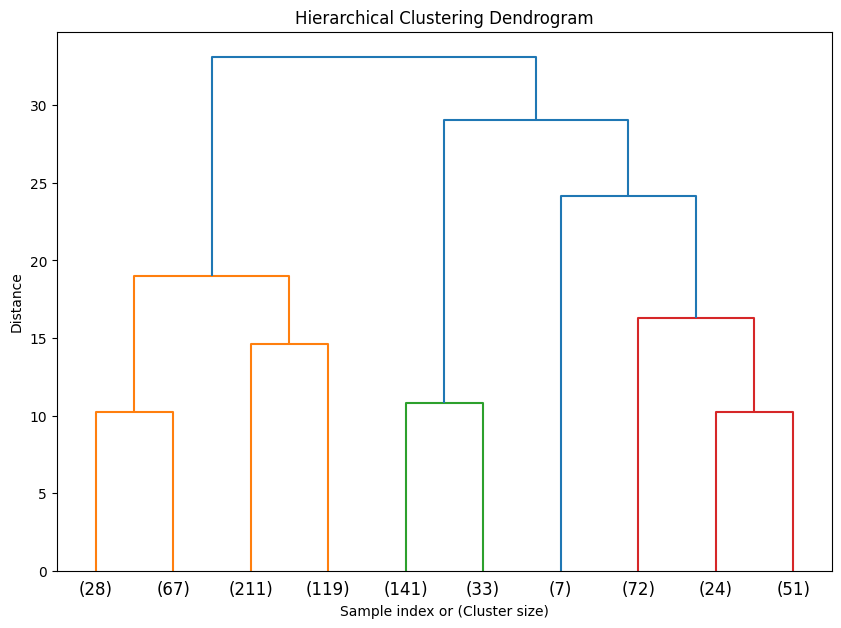

   hours    wage  educ  HACCluster
0   1610  3.3540    12           2
1   1656  1.3889    12           1
2   1980  4.5455    12           2
3    456  1.0965    12           1
4   1568  4.5918    14           2


In [29]:
data_subset = data[['hours', 'wage', 'educ']]


# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_subset)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
linkage_matrix = linkage(data_scaled, method='ward')

# Plot the dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or (Cluster size)")
plt.ylabel("Distance")
plt.show()

# Set the number of clusters and create labels
n_clusters = 3
hac_clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Add the HAC clustering results to the original dataframe
data['HACCluster'] = hac_clusters

# Display the first few rows of relevant columns
print(data[['hours', 'wage', 'educ', 'HACCluster']].head())

In [30]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data_scaled)
gmm_clusters = gmm.predict(data_scaled)

# Get the probability of each data point belonging to its assigned cluster
probs = gmm.predict_proba(data_scaled).max(axis=1)

# Set a threshold for identifying outliers (e.g., low probability threshold)
outlier_threshold = 0.2  # Points with prob < 0.2 are considered outliers
outliers = probs < outlier_threshold

# Add results to the original dataframe
data['GMMCluster'] = gmm_clusters
data['Outlier'] = outliers

# Display outlier status along with relevant columns
print(data[['hours', 'wage', 'educ', 'GMMCluster', 'Outlier']])

     hours    wage  educ  GMMCluster  Outlier
0     1610  3.3540    12           2    False
1     1656  1.3889    12           2    False
2     1980  4.5455    12           2    False
3      456  1.0965    12           2    False
4     1568  4.5918    14           2    False
..     ...     ...   ...         ...      ...
748      0     NaN    13           0    False
749      0     NaN    12           0    False
750      0     NaN    12           0    False
751      0     NaN    12           0    False
752      0     NaN     9           0    False

[753 rows x 5 columns]
